In [1]:
import pandas as pd
import numpy as np
import json
import ftfy
import re
from afinn import Afinn
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Read, convert and join all json files into a single dataframe

In [2]:
df = pd.DataFrame(columns = ['author', 'content', 'description', 'publishedAt', 'source_name',
       'source_url', 'title', 'url', 'urlToImage']) 

In [3]:
for i in range(1, 6):
    with open(f'data/{i}.json', 'r', encoding = "utf8") as j:
        contents = json.loads(j.read())
        contents = pd.json_normalize(contents['Article'])
        df = pd.concat([df, contents], ignore_index=True).drop_duplicates()

### Examine contents of the columns to decide which need to be discarded or cleaned

In [4]:
df

,author,content,description,publishedAt,source_name,source_url,title,url,urlToImage
0,"[""Rich Jones""]",When you subscribe we will use the informatio...,\n Jose Mourinho was reportedly sounded out by...,2020-12-04,mirror,mirror.co.uk,Arsenal reservations which led Jose Mourinho t...,https://www.mirror.co.uk/sport/football/news/j...,https://i2-prod.dailystar.co.uk/sport/football...
1,"[""Paul Krugman""]",Paul Krugman column: Learn to stop worrying a...,Why are economists thinking differently about ...,2020-12-04,orlandosentinel.com,orlandosentinel.com,Paul Krugman column: Learn to stop worrying an...,https://www.orlandosentinel.com/featured/sns-n...,https://www.orlandosentinel.com/resizer/8XgLNM...
2,"[""The Washington Times http://www.washingtonti...",Question of the Day Should Trump take his ele...,America's top infectious disease expert has ap...,2020-12-04,The Washington Times,washingtontimes.com,Fauci apologizes for suggesting UK rushed vacc...,https://www.washingtontimes.com/news/2020/dec/...,https://twt-thumbs.washtimes.com/media/image/2...
3,"[""Geoff Percival""]",United Oil drilling plans not hit by payment ...,Covid disruptions delayed approval of Hibiscus...,2020-12-04,Irish Examiner,irishexaminer.com,United Oil drilling plans not hit by payment d...,https://www.irishexaminer.com/business/compani...,https://www.irishexaminer.com/cms_media/module...
4,"[""Naseem S. Miller""]",The company that’s been building a freestandi...,The company that’s been building a freestandin...,2020-12-04,orlandosentinel.com,orlandosentinel.com,Proton therapy center at Horizon West unfinish...,https://www.orlandosentinel.com/health/os-ne-h...,https://www.orlandosentinel.com/resizer/KsVO-4...
...,...,...,...,...,...,...,...,...,...
495,"[""Guy Lodge""]","’76 Days’ Review: A Strong, Heart-Pounding Do...",Monitoring hospital activity through a period ...,2020-12-04,Variety,variety.com,'76 Days' Review: An Unsentimental But Stirrin...,https://variety.com/2020/film/reviews/76-days-...,https://variety.com/wp-content/uploads/2020/11...
496,"[""Reuters""]","Glencore boss Glasenberg to step down, Gary N...",By Zandi Shabalala and Helen ReidLONDON/JOHANN...,2020-12-04,Mail Online,dailymail.co.uk,"Glencore boss Glasenberg to step down, Gary Na...",https://www.dailymail.co.uk/wires/reuters/arti...,https://i.dailymail.co.uk/i/pix/m_logo_636x382...
497,"[""Will Thorne""]",‘The Mandalorian’: Has Boba Fett Got His Mojo...,"This week's episode of ""The Mandalorian"" sees ...",2020-12-04,Variety,variety.com,'The Mandalorian': Boba Fett Back in Action an...,https://variety.com/2020/tv/news/mandalorian-b...,https://variety.com/wp-content/uploads/2020/12...
498,"[""Reuters""]",Under-pressure Zidane insists he has Real's b...,"MADRID, Dec 4 (Reuters) - Under-fire Real Madr...",2020-12-04,Mail Online,dailymail.co.uk,Under-pressure Zidane insists he has Real's ba...,https://www.dailymail.co.uk/wires/reuters/arti...,https://i.dailymail.co.uk/i/pix/m_logo_636x382...


In [5]:
df.columns

Index(['author', 'content', 'description', 'publishedAt', 'source_name',
       'source_url', 'title', 'url', 'urlToImage'],
      dtype='object')

In [6]:
for i in range(len(df)):
    print(df.loc[i]['content'])
    print('-'*50)
    print(df.loc[i]['description'])
    print('-'*50)
    print(df.loc[i]['title'])
    print('\n\n')

 When you subscribe we will use the information you provide to send you these newsletters. Sometimes they’ll include recommendations for other related newsletters or services we offer. OurPrivacy Noticeexplains more about how we use your data, and your rights. You can unsubscribe at any time.
--------------------------------------------------

 Jose Mourinho was reportedly sounded out by Raul Sanllehi over the Arsenal job last year but had reservations which convinced him to take the Tottenham role instead
 
--------------------------------------------------
Arsenal reservations which led Jose Mourinho to Tottenham after Raul Sanllehi talks - Mirror Online



 Paul Krugman column: Learn to stop worrying and love government debt Amid all the wild swings in U.S. politics over the past decade, one thing has remained constant: the GOP position on government debt. The party considers high levels of debt an existential threat — if a Democrat is sitting in the White House. If a Republican pre

Sears Holdings: How To Buy 17 Dollars For 17 Cents (OTCMKTS:SHLDQ) | Seeking Alpha



 The market keeps pushing higher, despite an ongoing pandemic, with the major indices at all-time highs. I believe the market is pricing in a big stimulus plan from Congress, which means more gains will be difficult, even once it does get passed. Worse, we may not see stimulus until next year. Foreign buying of stocks has been extremely high recently. This often coincides with a drop in large-cap equities. Main Thesis The purpose of this article is to evaluate the Schwab U.S. Broad Market (SCHB) fund as an investment option at its current market price. SCHB is an ETF I cover for broad market exposure, as it sports a low expense ratio and holds over 2,400 stocks. As a result, I am maintaining a neutral rating on this fund, as I becoming increasingly concerned about the market's rising valuation. We are seeing COVID-19 cases spike again, in the U.S. and in Europe, yet stocks continue to push higher. Som

 Sun's out! Hot Saturday on cards to kick off weekend Yellow Level 1 warning for winds resulting in possible difficulty in navigation between Dassen Island and Hermanus off the Western Cape. Fire warnings: Extremely high fire danger conditions are expected over the Kamiesberg, Nama-Khoi, and Khai-Ma Municipalities of the Northern Cape. The weather in your region: Gauteng will be cloudy and cool with scattered showers and thundershowers. The expected UVB sunburn index is very high.
--------------------------------------------------
A hot day is in store to kick off the weekend, the South African Weather Service says.


--------------------------------------------------
Sun's out! Hot Saturday on cards to kick off weekend | News24



 Hoosic Valley High School goes to remote learning for Friday SCHAGHTICOKE – Hoosic Valley Junior Senior High School went to remote learning on Friday as a precautionary measure after a staff member was exposed to a person who tested positive for COVID-19, t

Candy is cool and all, but there are much butter stocking stuffer ideas that they'll be...
--------------------------------------------------
18 stocking stuffers that are much better than coal



 Germany readies vaccine centers amid security concerns 1of4The construction of a planned vaccination center is presented by the Berlin authorities during a media event at the 'Arena Berlin' event venue in Berlin, Germany, Thursday, Dec. 3, 2020. Berlin city authorites will set up six vaccine center until the end of the month.Markus Schreiber/APShow MoreShow Less2of4The construction of a planned vaccination center is presented by the Berlin authorities during a media event at the 'Arena Berlin' event venue in Berlin, Germany, Thursday, Dec. 3, 2020. Berlin city authorites will set up six vaccine center until the end of the month.Markus Schreiber/APShow MoreShow Less3of4The construction of a planned vaccination center is presented by the Berlin authorities during a media event at the 'Arena Be


 City Road and Dudley Road are understood to have been closed off, while police deal with the incident
 
--------------------------------------------------
Man 'stabbed' in Winson Green with major road closures in place - Birmingham Live



 As hospitals cope with a COVID-19 surge, cyber threats loom BURLINGTON, Vt. (AP) - By late morning on Oct. 28, staff at the University of Vermont Medical Center noticed the hospital´s phone system wasn´t working. Then the internet went down, and the Burlington-based center's technical infrastructure with it. Employees lost access to databases, digital health records, scheduling systems and other online tools they rely on for patient care. In its main laboratory, which runs about 8,000 tests a day, employees printed or hand-wrote results and carried them across facilities to specialists. Outdated, internet-free technologies experienced a revival. "We went around and got every fax machine that we could," said UVM Medical Center Chief Operating Offic

#### Remove publishedAt (all dates are same), source_url and urlToImage columns. Also remove author (not focusing on inidividual authors but on news outlets as a whole). Description can also be dropped since it is similar to headline. url for articles are also not needed.

In [7]:
df.pop('source_url')
df.pop('urlToImage')
df.pop('publishedAt')
df.pop('author')
df.pop('description')
df.pop('url')

0      https://www.mirror.co.uk/sport/football/news/j...
1      https://www.orlandosentinel.com/featured/sns-n...
2      https://www.washingtontimes.com/news/2020/dec/...
3      https://www.irishexaminer.com/business/compani...
4      https://www.orlandosentinel.com/health/os-ne-h...
                             ...                        
495    https://variety.com/2020/film/reviews/76-days-...
496    https://www.dailymail.co.uk/wires/reuters/arti...
497    https://variety.com/2020/tv/news/mandalorian-b...
498    https://www.dailymail.co.uk/wires/reuters/arti...
499    https://www.dailymail.co.uk/wires/reuters/arti...
Name: url, Length: 500, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   content      500 non-null    object
 1   source_name  500 non-null    object
 2   title        500 non-null    object
dtypes: object(3)
memory usage: 35.6+ KB


In [9]:
df

,content,source_name,title
0,When you subscribe we will use the informatio...,mirror,Arsenal reservations which led Jose Mourinho t...
1,Paul Krugman column: Learn to stop worrying a...,orlandosentinel.com,Paul Krugman column: Learn to stop worrying an...
2,Question of the Day Should Trump take his ele...,The Washington Times,Fauci apologizes for suggesting UK rushed vacc...
3,United Oil drilling plans not hit by payment ...,Irish Examiner,United Oil drilling plans not hit by payment d...
4,The company that’s been building a freestandi...,orlandosentinel.com,Proton therapy center at Horizon West unfinish...
...,...,...,...
495,"’76 Days’ Review: A Strong, Heart-Pounding Do...",Variety,'76 Days' Review: An Unsentimental But Stirrin...
496,"Glencore boss Glasenberg to step down, Gary N...",Mail Online,"Glencore boss Glasenberg to step down, Gary Na..."
497,‘The Mandalorian’: Has Boba Fett Got His Mojo...,Variety,'The Mandalorian': Boba Fett Back in Action an...
498,Under-pressure Zidane insists he has Real's b...,Mail Online,Under-pressure Zidane insists he has Real's ba...


#### the titles contain names of sources that aren't even present in the source_name column, so we can clean some of them out and then apply tokenisation and lemmatization to the text left after

In [10]:
df.source_name.value_counts()

Mail Online         61
Express.co.uk       36
mySA                28
Seeking Alpha       26
                    25
                    ..
The Moscow Times     1
Offspring            1
The Grapevine        1
Rediff               1
courant.com          1
Name: source_name, Length: 63, dtype: int64

In [11]:
sources = ['The Indian Express', 'News | DW', 'Express.co.uk', 'Washington Times', 'Mirror Online', 
           'postandcourier.com', 'richmond.com', 'Baltimore Sun', 'Wales Online', 'Daily Star', 'The Financial Express',
          'Daily Mail Online', 'Business Insider', 'CNN Underscored', 'CNN', 'unionleader.com', 'Digg', 'journalstar.com', 
          'Seeking Alpha', 'madison.com', 'Chicago Tribune', 'The Morning Call', 'Heavy.com', 'Daily Press', 'Vanity Fair',
          'Variety', 'Japan Today', 'omaha.com']

In [12]:
lemmatizer = WordNetLemmatizer()
afinn = Afinn(language='en')

In [13]:
def clean_title(text):
    for source in sources:
        if source in text:
            text = text.replace(source, '')
    return text

In [14]:
def clean(text):
    text = ftfy.fix_text(text)
    text = re.sub(r'\n',r'',text)
    text = re.sub(r'[^A-Za-z\s]',r'',text)
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    stop_words = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token, pos="v") for token in tokens]
    text = ' '.join([str(token) for token in tokens]) 
    return text

In [15]:
def sentiment_score(text):
    return round(afinn.score(text) / len(text.split()) * 100, 2)

In [16]:
df['clean_title'] = df['title'].apply(lambda x: clean_title(x))

In [17]:
df['clean_title'] = df['clean_title'].apply(lambda x: clean(x))

In [18]:
df['clean_content'] = df['content'].apply(lambda x: clean(x))

In [19]:
df['content_score'] = df['content'].apply(lambda x: sentiment_score(x))

In [20]:
df

,content,source_name,title,clean_title,clean_content,content_score
0,When you subscribe we will use the informatio...,mirror,Arsenal reservations which led Jose Mourinho t...,arsenal reservations lead jose mourinho totten...,subscribe use information provide send newslet...,0.00
1,Paul Krugman column: Learn to stop worrying a...,orlandosentinel.com,Paul Krugman column: Learn to stop worrying an...,paul krugman column learn stop worry love gove...,paul krugman column learn stop worry love gove...,-2.77
2,Question of the Day Should Trump take his ele...,The Washington Times,Fauci apologizes for suggesting UK rushed vacc...,fauci apologize suggest uk rush vaccine decision,question day trump take election challenge sup...,0.66
3,United Oil drilling plans not hit by payment ...,Irish Examiner,United Oil drilling plans not hit by payment d...,unite oil drill plan hit payment delay,unite oil drill plan hit payment delay covid d...,6.49
4,The company that’s been building a freestandi...,orlandosentinel.com,Proton therapy center at Horizon West unfinish...,proton therapy center horizon west unfinished ...,company thats build freestanding proton therap...,-0.52
...,...,...,...,...,...,...
495,"’76 Days’ Review: A Strong, Heart-Pounding Do...",Variety,'76 Days' Review: An Unsentimental But Stirrin...,days review unsentimental stir covid documentary,days review strong heartpounding doc medical f...,0.00
496,"Glencore boss Glasenberg to step down, Gary N...",Mail Online,"Glencore boss Glasenberg to step down, Gary Na...",glencore boss glasenberg step gary nagle name,glencore boss glasenberg step gary nagle name ...,2.28
497,‘The Mandalorian’: Has Boba Fett Got His Mojo...,Variety,'The Mandalorian': Boba Fett Back in Action an...,mandalorian boba fett back action baby yoda tr...,mandalorian boba fett get mojo back burn quest...,-4.91
498,Under-pressure Zidane insists he has Real's b...,Mail Online,Under-pressure Zidane insists he has Real's ba...,underpressure zidane insist reals back,underpressure zidane insist reals back madrid ...,11.05


In [21]:
df.content_score.describe()

count    500.000000
mean       0.813520
std        6.602728
min      -24.820000
25%       -2.155000
50%        1.440000
75%        4.782500
max       22.280000
Name: content_score, dtype: float64

#### now observe word frequency to find trending topics using a count vectorizer. Applying it on content and title gives similar results, but not very conclusive observation

In [22]:
cv = CountVectorizer(stop_words = stopwords.words('english'))
df_word_freq = cv.fit_transform(df.clean_content)
top_words = pd.DataFrame(df_word_freq.toarray(), columns=cv.get_feature_names())
top_words = pd.DataFrame((top_words.sum()).sort_values(ascending = False)).reset_index()
top_words = top_words.rename(columns = {'index': 'word', 0:'frequency'})
for i in range(len(top_words)):
    print(top_words.loc[i].word, top_words.loc[i].frequency)

say 578
new 308
time 275
use 261
one 207
company 191
make 186
take 183
include 181
year 180
us 178
also 168
first 161
covid 156
friday 152
two 152
service 149
last 143
people 142
get 139
would 135
go 135
game 133
right 130
state 129
newsletters 128
plan 128
come 126
data 124
market 122
provide 120
dec 119
years 114
relate 113
since 112
work 109
week 109
offer 107
show 106
report 104
well 102
day 101
back 97
court 97
give 97
send 96
pandemic 94
christmas 94
coronavirus 93
government 92
need 91
find 90
information 90
group 89
home 88
see 88
thursday 86
part 85
call 85
case 85
team 84
next 83
vaccine 82
like 82
million 81
news 80
could 79
continue 79
health 77
police 77
start 76
end 75
many 75
accord 75
price 74
series 74
stock 73
look 73
change 72
play 72
around 71
even 71
remain 70
minister 70
return 70
hold 70
test 70
deal 69
leave 69
share 68
free 68
tell 68
president 67
month 67
expect 67
trade 67
meet 67
theyll 67
city 67
sometimes 66
due 66
increase 66
number 66
subscribe 66
decemb

survey 14
land 14
couple 14
ham 14
zero 14
progress 14
administration 14
quality 14
negotiations 14
especially 14
device 14
zone 14
german 14
africa 14
summer 14
battle 14
exclusive 14
stall 14
highlight 14
total 14
facebook 14
struggle 13
expert 13
squad 13
transformation 13
van 13
theyre 13
getty 13
adopt 13
natural 13
participate 13
fuel 13
stay 13
blue 13
ensure 13
ease 13
employment 13
implement 13
decrease 13
dead 13
monitor 13
actually 13
strike 13
hotels 13
song 13
type 13
farmer 13
throughout 13
roles 13
roku 13
prompt 13
property 13
divide 13
citys 13
respond 13
protection 13
reserve 13
multiple 13
purchase 13
pilot 13
relief 13
cape 13
quarantine 13
youth 13
carry 13
plenty 13
albany 13
youre 13
tv 13
room 13
determine 13
vehicle 13
factory 13
liverpool 13
ireland 13
wall 13
doubt 13
murder 13
tree 13
credit 13
analyse 12
celebrate 12
pressure 12
enhance 12
crisis 12
quickly 12
gary 12
students 12
majority 12
meanwhile 12
stimulus 12
mass 12
diplomatic 12
whats 12
fear 12
ms

usually 6
mourinho 6
mysterious 6
severe 6
dynamics 6
lawyer 6
comeback 6
sewer 6
charm 6
vaccinate 6
michael 6
chahal 6
christian 6
settle 6
properties 6
blame 6
evidence 6
bipartisan 6
serratos 6
formula 6
annually 6
expensive 6
seriously 6
easy 6
minimum 6
vt 6
shes 6
worry 6
eastern 6
province 6
formal 6
pandemics 6
afp 6
afternoon 6
couldnt 6
tradition 6
lewis 6
alkm 6
remember 6
investigation 6
juanalamo 6
investigators 6
brown 6
contain 6
eventually 6
canada 6
brook 6
albion 6
verizon 6
rollout 6
accelerate 6
iran 6
joel 6
relations 6
delivery 6
rocket 6
draft 6
locate 6
exposure 6
russia 6
broad 6
broadcast 6
regulators 6
regulatory 6
inventory 6
broader 6
dozen 6
load 6
introduction 6
candy 6
clean 6
bull 6
fraud 6
extraordinary 6
buster 6
jennifer 6
responsible 6
ivan 6
merger 6
dividend 6
phase 6
pharrsan 6
dog 6
buzz 6
retail 6
jam 6
pfizerbiontech 6
footprint 6
meringue 6
ride 6
itll 6
bullish 6
rescue 6
version 6
merry 6
pic 6
permission 6
republic 6
external 6
isr 6
vess

array 4
exams 4
gregory 4
aubrey 4
privately 4
airline 4
planet 4
planetwarming 4
discretionary 4
eps 4
todays 4
discount 4
observe 4
syracuse 4
class 4
ultimately 4
meter 4
platforms 4
depict 4
tomorrow 4
playstation 4
halt 4
grogu 4
favourite 4
artificial 4
aggressive 4
artists 4
prosecutor 4
whos 4
visible 4
marchetti 4
unavailable 4
lakh 4
athlon 4
wed 4
consistent 4
raven 4
landscape 4
cast 4
adjust 4
propaganda 4
takeaway 4
un 4
nextgen 4
equip 4
takieddine 4
maskwearing 4
mozambique 4
format 4
caseload 4
lane 4
talent 4
promotion 4
mar 4
proof 4
founder 4
thomas 4
editor 4
lighter 4
organizations 4
ellison 4
schulman 4
schmid 4
input 4
mention 4
definitely 4
spectrum 4
alternative 4
insider 4
beach 4
scenario 4
path 4
brazils 4
scarf 4
bbc 4
scandalous 4
inspector 4
collaboration 4
inspectorate 4
compete 4
patrick 4
breakthrough 4
bayelsa 4
specifically 4
toward 4
dtc 4
wright 4
dune 4
defender 4
borrow 4
upgrade 4
townsend 4
bottas 4
cookie 4
wrap 4
bounce 4
southgate 4
existen

wsj 3
filmmaking 3
xmas 3
accommodate 3
xpev 3
xpress 3
yen 3
abuja 3
yorkshire 3
youll 3
younger 3
youtube 3
youve 3
yoy 3
felony 3
fellow 3
zidane 3
abidjan 3
abe 3
zoo 3
ab 3
federico 3
writer 3
wouldnt 3
achievement 3
fitness 3
adhere 3
flammable 3
flagship 3
additionally 3
fantastic 3
fiveyear 3
windows 3
adams 3
adam 3
winger 3
wire 3
fireball 3
wisconsin 3
wish 3
firstteam 3
withhold 3
witness 3
farce 3
wolverhampton 3
wonderful 3
wood 3
farr 3
fry 3
alive 3
throat 3
ukraine 3
golden 3
tribune 3
anyway 3
goalscorer 3
trophy 3
trousers 3
antiparty 3
glimpse 3
tshidi 3
tsla 3
anonymity 3
evolve 3
turnout 3
anniversary 3
giroud 3
gim 3
annapolis 3
exact 3
animation 3
animate 3
twothirds 3
gibb 3
gethsemane 3
apology 3
gop 3
evaluation 3
architect 3
tick 3
greatly 3
tiktok 3
till 3
ethan 3
ethical 3
tip 3
tipton 3
etihad 3
euro 3
grandmother 3
evaluate 3
toney 3
grain 3
approximately 3
grade 3
gp 3
apply 3
application 3
traction 3
appearances 3
traders 3
examples 3
uks 3
allegations

jon 2
gratitude 2
grassroots 2
eugene 2
graphic 2
graph 2
grandfather 2
grace 2
granddaughter 2
jr 2
grammy 2
dennis 2
grail 2
gradually 2
maths 2
gracia 2
gut 2
mario 2
maria 2
itch 2
hawkish 2
havdalah 2
entrust 2
dominate 2
italia 2
lisbon 2
italo 2
hasty 2
harvest 2
donation 2
dave 2
daughterinlaw 2
mangrove 2
enugu 2
harrogate 2
harrell 2
harford 2
hardly 2
isolation 2
enthusiasts 2
dodge 2
irrelevant 2
heighten 2
height 2
dayhoff 2
malt 2
hed 2
mamata 2
enslave 2
heavier 2
entertainers 2
islands 2
islamabad 2
healthy 2
islamist 2
doodle 2
literary 2
heal 2
literally 2
lite 2
iv 2
ivorian 2
margrethe 2
haircut 2
hallie 2
marco 2
equivalent 2
jeff 2
jefferson 2
divert 2
hairstyle 2
linda 2
erect 2
jbs 2
jens 2
eremieyo 2
marenzi 2
habitats 2
margin 2
marginal 2
habiba 2
limitededition 2
marcelo 2
jazz 2
jackson 2
linkedin 2
jaein 2
happiness 2
jake 2
jamaica 2
doc 2
handwrote 2
equal 2
jango 2
equally 2
maputo 2
darkly 2
manual 2
handful 2
linger 2
jasper 2
manuscripts 2
javonte 2


ziggy 2
mkhwanazis 2
ziad 2
squawk 2
cramlington 2
squeeze 2
craft 2
zaha 2
abolitionist 2
cpo 2
yvonne 2
cozy 2
academic 2
specify 2
bello 2
mysteriously 2
barbakow 2
sophomore 2
belgium 2
mywigan 2
myth 2
accurately 2
accuracy 2
sonata 2
wrongly 2
wsjs 2
copy 2
wu 2
stark 2
beiruts 2
naik 2
naked 2
bearish 2
natanz 2
bankers 2
worldwide 2
naval 2
sometime 2
naturally 2
worsen 2
nash 2
worthless 2
cookware 2
naperville 2
worsethanexpected 2
achievements 2
namely 2
cooperation 2
behindthescenes 2
stardust 2
musical 2
mph 2
becci 2
corrections 2
spat 2
correspond 2
corridor 2
corruption 2
corso 2
muse 2
cortinas 2
beaune 2
barefoot 2
cory 2
accessories 2
mourn 2
correction 2
muidumbe 2
mullingar 2
beechwood 2
xpeng 2
stanford 2
multicore 2
beehive 2
accompany 2
beg 2
coronavirushit 2
soyuncu 2
sovereign 2
accordingly 2
stardom 2
cornish 2
musa 2
wellbeing 2
nufc 2
welfare 2
collide 2
airbus 2
colleges 2
participation 2
participants 2
partially 2
colletta 2
parkin 2
paso 2
sisir 2
backan

anil 1
exam 1
anita 1
ann 1
exacerbate 1
annes 1
ex 1
ewout 1
basketball 1
dual 1
embry 1
clinically 1
clock 1
denbighshire 1
clockwise 1
clone 1
demonstrate 1
demon 1
closest 1
demolition 1
cloudradio 1
demolish 1
clubcorp 1
clubleague 1
clubleagueplayer 1
cluster 1
clutch 1
cm 1
cmmidev 1
cnbcs 1
cnbg 1
cnnresidents 1
democracy 1
demo 1
dementiastricken 1
coaster 1
deluxe 1
clive 1
climax 1
circular 1
cliff 1
circulate 1
circumstantial 1
depreciation 1
civically 1
claimant 1
depots 1
claire 1
clan 1
depiction 1
clang 1
claridges 1
classy 1
denzil 1
claudia 1
claus 1
clause 1
claustrophobic 1
cleaner 1
cleanup 1
clearer 1
clearwater 1
cleaver 1
denise 1
clemson 1
clever 1
coat 1
delon 1
coax 1
cocaine 1
collections 1
collective 1
defendants 1
collingwoodwsj 1
collisions 1
colo 1
colonie 1
color 1
defamation 1
colorectal 1
colossal 1
deeply 1
deepfrying 1
deepest 1
columbians 1
deeper 1
columbias 1
columnist 1
combat 1
combinations 1
combos 1
comedic 1
deduct 1
comic 1
commend 1
defens

caraeffgetty 1
discrimination 1
discoveryblown 1
carbondioxide 1
carbonera 1
discourage 1
disconcert 1
carl 1
cardiac 1
cardigan 1
disco 1
cardillo 1
disclosure 1
cardlike 1
cardona 1
disclaimersafe 1
disclaimers 1
disclaimer 1
caribou 1
dizzy 1
byted 1
dj 1
buckowskialbany 1
broaden 1
downtown 1
broadridge 1
downsides 1
broil 1
downplay 1
brokerages 1
bronx 1
bronxville 1
bronze 1
dovish 1
brotherly 1
douglas 1
doug 1
browser 1
brummies 1
brunch 1
bruno 1
doubtmichael 1
doubtless 1
brunswick 1
brutal 1
brutality 1
bsnl 1
buaisou 1
draconian 1
dragao 1
dragonflies 1
brioche 1
bricket 1
bricks 1
brickwork 1
bridgewater 1
drillers 1
bridie 1
bridle 1
briefly 1
drifter 1
brighthouse 1
brino 1
drazen 1
dragothe 1
drawer 1
brisk 1
drawback 1
bristol 1
brit 1
dramas 1
briton 1
brits 1
brittany 1
brka 1
brkb 1
buck 1
buckowskishow 1
dlamini 1
dota 1
dolapo 1
burrow 1
bushiri 1
bushiris 1
bushtucker 1
buss 1
butcher 1
butler 1
butter 1
documentaries 1
buttheres 1
button 1
buybacks 1
docu 1
buy

randomly 1
rape 1
raphael 1
rapists 1
rarely 1
readymade 1
rashfords 1
ratesetting 1
rationale 1
ratios 1
rav 1
ravindra 1
rch 1
reactions 1
readergenerated 1
readiness 1
southampton 1
southbank 1
southeastern 1
urbi 1
validation 1
valuables 1
valuefocused 1
vancouver 1
vanessa 1
vantam 1
variables 1
variation 1
vary 1
vault 1
vegascentered 1
vegetable 1
vegetablesread 1
vegetation 1
velocicoasters 1
velvet 1
vendersits 1
vendor 1
veneto 1
vengeance 1
ventilation 1
venture 1
verb 1
validate 1
valid 1
valhalla 1
utds 1
url 1
urs 1
usage 1
useraccessible 1
usercentered 1
userfriendly 1
username 1
usmade 1
usrussia 1
usx 1
utilitys 1
valerie 1
utilize 1
uttar 1
utterly 1
uvb 1
va 1
vaccinators 1
vaccinemaker 1
valance 1
valdosta 1
vale 1
verdict 1
verhofstadt 1
verifiable 1
virusrelated 1
viper 1
virat 1
virginias 1
virtualization 1
virtualize 1
virtualized 1
virtualonly 1
virtues 1
viruses 1
virusled 1
visa 1
villa 1
visconti 1
visions 1
visitor 1
vittorio 1
vivek 1
vivendi 1
vladimir 1


takal 1
takeawayonly 1
takle 1
talents 1
talisman 1
talkradio 1
tally 1
talukder 1
tanner 1
taverns 1
tano 1
tantalize 1
tariff 1
tarik 1
tarkin 1
tarnish 1
tass 1
tastebuds 1
tatooine 1
tattoo 1
tension 1
tenure 1
tikri 1
threeday 1
thin 1
thinkers 1
thinner 1
thirdparties 1
thirteen 1
thirtysomething 1
thompson 1
thora 1
thoroughly 1
threecourse 1
threeman 1
thicken 1
threemonth 1
threetenth 1
thrive 1
throng 1
thrust 1
thundershowers 1
ticker 1
ticketthis 1
tiered 1
tighter 1
thicksliced 1
theyd 1
teo 1
testify 1
teodoli 1
teos 1
tephilah 1
terminal 1
terminals 1
terrain 1
terrie 1
terror 1
terrorism 1
terrorist 1
textbook 1
thesunproviding 1
textmessage 1
texts 1
thankfully 1
theft 1
thefts 1
theorist 1
theorists 1
thereby 1
therell 1
theresa 1
phe 1
pfizers 1
feedback 1
impersonal 1
inconvenience 1
incorrect 1
incorrectly 1
incur 1
incwest 1
indefinite 1
indelicacy 1
indemnity 1
indepth 1
indiana 1
indiapakistan 1
indication 1
indicators 1
indicox 1
indigenously 1
indirect 1
indis

hip 1
highfliers 1
hisher 1
histamine 1
hitman 1
hitters 1
hoard 1
hoarders 1
hoare 1
hobby 1
hobgate 1
hockley 1
highimpact 1
highend 1
helpful 1
herselfis 1
hemisphere 1
hemorrhage 1
hempbased 1
hence 1
herbert 1
hercules 1
heresan 1
hermanus 1
heroics 1
heron 1
hertfordshire 1
hierarchy 1
hesketh 1
hesse 1
hessenschau 1
hevican 1
hey 1
heyday 1
hg 1
hi 1
hiatus 1
hideout 1
hao 1
hannan 1
handy 1
grandchildren 1
gorman 1
gossip 1
goughs 1
gov 1
govern 1
govt 1
graber 1
graduate 1
graham 1
grams 1
granville 1
goodwill 1
grapes 1
graphics 1
grapple 1
grateful 1
gratification 1
gratify 1
grave 1
gravy 1
gray 1
graybeal 1
google 1
goodson 1
greedo 1
gloucestershire 1
giovanni 1
girouds 1
giuseppe 1
givens 1
glare 1
glasenbergs 1
glencores 1
globalization 1
globals 1
gloom 1
gmp 1
goodness 1
gmt 1
goahead 1
god 1
godfather 1
godsgift 1
goingforawalkafterworkingfromhome 1
goldindia 1
golf 1
gondolas 1
goodman 1
grease 1
greenback 1
handsome 1
hail 1
gus 1
gustavo 1
gusts 1
gutenberg 1
guzm

manhattan 1
manhattans 1
manitoba 1
mankinds 1
manny 1
manor 1
mansarovar 1
mansion 1
mason 1
massproduce 1
mentality 1
melanoma 1
medics 1
medill 1
medina 1
medinipur 1
mediumsized 1
meerting 1
meetandgreet 1
meg 1
megabudget 1
mehdi 1
mellon 1
medha 1
melody 1
melt 1
meltdown 1
memberships 1
membersonly 1
memes 1
memo 1
memorable 1
memos 1
menace 1
medically 1
medal 1
mastera 1
mayors 1
mastroianni 1
matchwinner 1
matriculants 1
matshidiso 1
mattel 1
matteo 1
matthew 1
mattresses 1
maurice 1
mayhem 1
mb 1
mechanics 1
mbmg 1
mcbride 1
mclaren 1
mcqueens 1
mcquillins 1
mcs 1
meaningless 1
meat 1
meats 1
mechanical 1
aaa 1


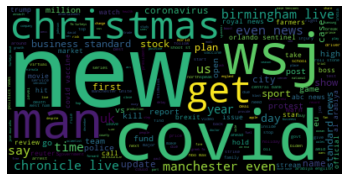

In [23]:
wc = WordCloud(stopwords = stopwords.words('english'))
wordcloud = wc.generate(' '.join(df['clean_title'].apply(str)))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

#### Better way to find trends would be to extract named entities, their types and word frequency. 

In [24]:
entities = dict()
for sent in nltk.sent_tokenize(' '.join(df['content'].values)):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            tag = chunk.label()
            val = ' '.join(c[0] for c in chunk)
            if tag in entities:
                if val in entities[tag]:
                    entities[tag][val] += 1
                else:
                    entities[tag][val] = 1
            else:
                entities[tag] = dict()
                entities[tag][val] = 1

all_entities = pd.DataFrame(columns = ['Tag', 'Entity', 'Count'])
for tag in entities:
    for item in entities[tag]:
        row = {'Tag': tag, 'Entity': item, 'Count': entities[tag][item]}
        all_entities = all_entities.append(row, ignore_index = True) 
all_entities = all_entities.sort_values('Count', ascending = False)

In [39]:
entities

{'ORGANIZATION': {'OurPrivacy': 62,
  'GOP': 2,
  'Republican': 10,
  'Obama': 3,
  'International Monetary Fund': 2,
  'Supreme Court': 21,
  'National Institute': 4,
  'Infectious Diseases': 5,
  'National Institutes': 3,
  'Senate': 29,
  'Senate Health': 3,
  'Pensions Committee': 3,
  'LONDON': 3,
  'AP': 64,
  'America': 3,
  'Oil': 1,
  'Hibiscus': 1,
  'United Oil': 2,
  'Gas': 1,
  'Center': 5,
  'Provision Solutions': 1,
  'Orlando': 1,
  'DuBois': 1,
  'Hamlin': 1,
  'TOpics Greek': 1,
  'Mediterranean': 4,
  'NATO': 5,
  'More Related Articles': 1,
  'Coast Guard': 3,
  'Fort Myers': 1,
  'District Court': 3,
  'Fort Myers Beach': 1,
  'Fort Myers Beach Fire Rescue': 1,
  'Florida Fish': 1,
  'Thompson': 1,
  'Centre': 5,
  'Parliament': 3,
  'Haryana': 1,
  'MSP': 3,
  'MP': 1,
  'All India Kisan Sangharsh Coordination Committee': 1,
  'HBO Max Cineworld': 1,
  'PA Los Angeles Correspondent Cinema': 1,
  'Suicide Squad': 1,
  'HBO': 8,
  'AYUSH': 14,
  'Commerce': 4,
  'Mi

In [25]:
all_entities[all_entities.Tag == 'ORGANIZATION'].Count.sum()

2635

In [40]:
all_entities

,Tag,Entity,Count
3122,GPE,U.S.,71
13,ORGANIZATION,AP,64
0,ORGANIZATION,OurPrivacy,62
3194,GPE,EU,54
278,ORGANIZATION,RGS,47
...,...,...,...
1682,PERSON,Levy,1
1685,PERSON,Tiger Finance LLC,1
1686,PERSON,Andrew Clarke,1
1687,PERSON,Clarke,1


In [58]:
all_entities.to_csv("Entities.csv")

In [27]:
all_entities[(all_entities.Count >= 10) & ((all_entities.Tag == 'ORGANIZATION') | (all_entities.Tag == 'PERSON'))]

,Tag,Entity,Count
13,ORGANIZATION,AP,64
0,ORGANIZATION,OurPrivacy,62
278,ORGANIZATION,RGS,47
118,ORGANIZATION,Reuters,31
9,ORGANIZATION,Senate,29
1472,PERSON,Christmas,27
126,ORGANIZATION,UK,25
5,ORGANIZATION,Supreme Court,21
212,ORGANIZATION,HBO Max,20
205,ORGANIZATION,CEO,20


#### can easily see all trending people like AP, Trump, Johnson etc put into perspective now

In [28]:
temp = all_entities[((all_entities.Tag == 'ORGANIZATION') | (all_entities.Tag == 'PERSON'))]

In [29]:
words = dict()
for i in range(len(temp.reset_index())):
    words[temp.iloc[i]['Entity']] = temp.iloc[i]['Count']

In [30]:
all_entities

,Tag,Entity,Count
3122,GPE,U.S.,71
13,ORGANIZATION,AP,64
0,ORGANIZATION,OurPrivacy,62
3194,GPE,EU,54
278,ORGANIZATION,RGS,47
...,...,...,...
1682,PERSON,Levy,1
1685,PERSON,Tiger Finance LLC,1
1686,PERSON,Andrew Clarke,1
1687,PERSON,Clarke,1


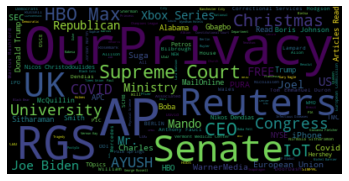

In [31]:
wc = WordCloud(stopwords = stopwords.words('english'))
wordcloud = wc.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

In [32]:
def NER(term):
    entities = dict()
    
    for sent in nltk.sent_tokenize(' '.join(df[df['content'].str.contains(f'(?i){term}')].content.values)):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                tag = chunk.label()
                val = ' '.join(c[0] for c in chunk)
                if tag in entities:
                    if val in entities[tag]:
                        entities[tag][val] += 1
                    else:
                        entities[tag][val] = 1
                else:
                    entities[tag] = dict()
                    entities[tag][val] = 1

    all_entities = pd.DataFrame(columns = ['Tag', 'Entity', 'Count'])
    
    for tag in entities:
        for item in entities[tag]:
            row = {'Tag': tag, 'Entity': item, 'Count': entities[tag][item]}
            all_entities = all_entities.append(row, ignore_index = True) 

    all_entities = all_entities.sort_values('Count', ascending = False)
    temp = all_entities[((all_entities.Tag == 'ORGANIZATION') | (all_entities.Tag == 'PERSON'))]

    words = dict()

    for i in range(len(temp.reset_index())):
        words[temp.iloc[i]['Entity']] = temp.iloc[i]['Count']
    wc = WordCloud(stopwords = stopwords.words('english'))
    wordcloud = wc.generate_from_frequencies(words)
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.axis('off')
    plt.show()
    
    return temp

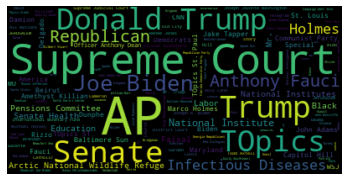

,Tag,Entity,Count
17,PERSON,Trump,20
170,ORGANIZATION,AP,19
162,ORGANIZATION,Supreme Court,17
166,ORGANIZATION,Senate,8
3,PERSON,Donald Trump,8
...,...,...,...
25,PERSON,Susanne,1
26,PERSON,Miller,1
1,PERSON,Krugman,1
30,PERSON,John Ratcliffe,1


In [45]:
NER('trump')

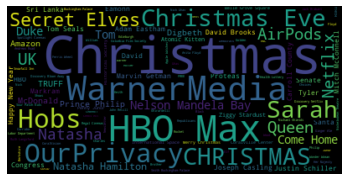

,Tag,Entity,Count
95,PERSON,Christmas,27
235,ORGANIZATION,Christmas,18
326,ORGANIZATION,HBO Max,8
327,ORGANIZATION,WarnerMedia,7
255,ORGANIZATION,OurPrivacy,5
...,...,...,...
128,PERSON,Read,1
127,PERSON,Stephen Huszar,1
126,PERSON,Leon,1
125,PERSON,Lacey Chabert,1


In [42]:
NER('christmas')

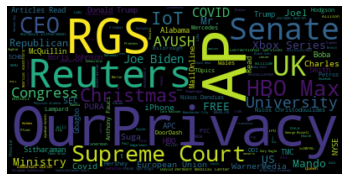

,Tag,Entity,Count
13,ORGANIZATION,AP,64
0,ORGANIZATION,OurPrivacy,62
278,ORGANIZATION,RGS,47
118,ORGANIZATION,Reuters,31
9,ORGANIZATION,Senate,29
...,...,...,...
1681,PERSON,Wick,1
1682,PERSON,Levy,1
1685,PERSON,Tiger Finance LLC,1
1686,PERSON,Andrew Clarke,1


In [34]:
NER('')

In [49]:
def coverage(term):
    temp = df[df['content'].str.contains(f'(?i){term}')].groupby(by = 'source_name')['content_score'].agg('mean').reset_index().sort_values(by = 'content_score') 
    temp.replace('', np.nan, inplace=True)
    temp.dropna(inplace=True)
    plt.figure(figsize=(6, 6))
    plt.xticks(rotation=90)
    plt.bar(temp.source_name, temp.content_score)
    plt.show()

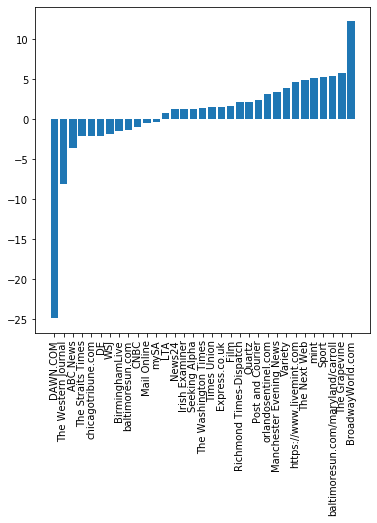

In [56]:
coverage('covid')

In [37]:
t = df[df['content'].str.contains('(?i)trump')].reset_index()
for i in range(len(t)):
    print(t.iloc[i]['content'])
    print()

 Paul Krugman column: Learn to stop worrying and love government debt Amid all the wild swings in U.S. politics over the past decade, one thing has remained constant: the GOP position on government debt. The party considers high levels of debt an existential threat — if a Democrat is sitting in the White House. If a Republican president presides over big deficits, well, as Donald Trump’s budget director reportedly told supporters last year, “nobody cares.” So it’s a completely safe prediction that once Joe Biden is sworn in, we will once again hear lots of righteous Republican ranting about the evils of borrowing. What’s less clear is whether we’ll see a repeat of what happened during the Obama years, when many centrists — and much of the news media — both took obvious fiscal phonies seriously and joined in the chorus of fearmongering. Advertisement Let’s hope not. For the fact is that we’ve learned a lot about the economics of government debt over the past few years — enough so that O